In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [ ]:

!pip install pandas scikit-learn matplotlib seaborn joblib



In [ ]:
import pandas as pd

data = pd.read_csv("adult.csv")
data.head()




,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
data.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,1
race,1
gender,1


In [ ]:
# Make a copy of data
df = data.copy()

# Remove rows with missing values
df.replace(' ?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Label Encode all object (categorical) columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])


In [ ]:
# Split features and target (X and y)
X = df.drop('income', axis=1)
y = df['income']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4474
           1       0.72      0.62      0.67      1350

    accuracy                           0.86      5824
   macro avg       0.81      0.78      0.79      5824
weighted avg       0.85      0.86      0.85      5824



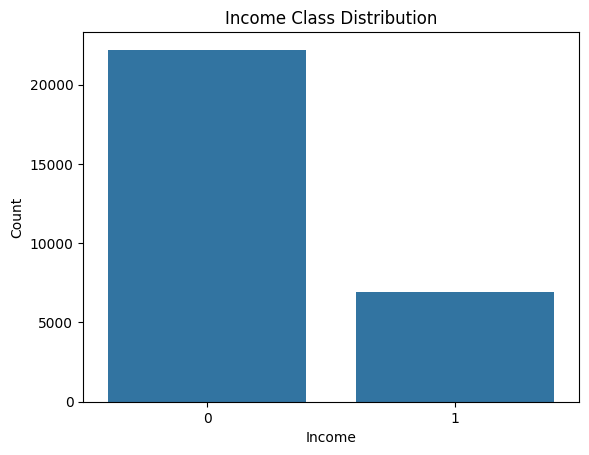

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)
plt.title("Income Class Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl', compress=3)



['model.pkl']

In [ ]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!mv model\(1\).pkl model.pkl



mv: cannot stat 'model(1).pkl': No such file or directory


In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

st.title("🚀 Employee Salary Prediction App")

st.write("📂 Upload a CSV file with employee features (raw values).")

uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])

if uploaded_file is not None:
    try:
        input_data = pd.read_csv(uploaded_file)
        st.write("📊 Uploaded Data Preview:")
        st.write(input_data.head())

        # Drop income if present
        if 'income' in input_data.columns:
            input_data.drop(columns=['income'], inplace=True)

        # Encode categorical features
        label_encoders = {}
        for col in input_data.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            input_data[col] = le.fit_transform(input_data[col])
            label_encoders[col] = le

        # Load the model
        model = joblib.load("model.pkl")
        st.success("✅ Model loaded successfully!")

        if st.button("Predict"):
            predictions = model.predict(input_data)
            input_data['Predicted Income'] = predictions
            st.write("🎯 Prediction Results:")
            st.write(input_data)

    except Exception as e:
        st.error(f"⚠️ Error: {e}")



In [ ]:
from google.colab import files

files.download("app.py")
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>